In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/shull/Documents/2023/istdsa/project01/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv').drop(columns=['routes', 'payment_method', 'transfers', 'station_complex_id', 'latitude', 'longitude', 'Georeference'])
df

,transit_timestamp,station_complex,borough,ridership
0,06/18/2023 07:00:00 PM,DeKalb Av (L),BK,232
1,06/18/2023 11:00:00 AM,Prospect Av (R),BK,180
2,01/24/2023 10:00:00 PM,103 St (6),M,86
3,09/05/2022 11:00:00 AM,103 St (6),M,205
4,05/08/2022 10:00:00 PM,103 St (1),M,133
...,...,...,...,...
5015193,03/15/2023 05:00:00 PM,Zerega Av (6),BX,98
5015194,04/25/2023 12:00:00 AM,Zerega Av (6),BX,1
5015195,05/12/2023 01:00:00 PM,Zerega Av (6),BX,50
5015196,06/04/2023 05:00:00 AM,Zerega Av (6),BX,31


In [3]:
weekdays = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [4]:
hours = np.array(['12AM', '1AM', '2AM', '3AM', '4AM', '5AM', '6AM', '7AM', '8AM', '9AM', '10AM', '11AM', '12PM', '1PM', '2PM', '3PM', '4PM', '5PM', '6PM', '7PM', '8PM', '9PM', '10PM', '11PM'])

In [5]:
df['transit_timestamp_1'] = df['transit_timestamp']

In [6]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

In [7]:
tt_col = df.pop('transit_timestamp')
df.insert(3, 'timestamp', tt_col)

In [8]:
tt1_col = df.pop('transit_timestamp_1')
df.insert(0, 'transit_timestamp', tt1_col)

In [9]:
df['hour'] = df['timestamp'].dt.hour
df['day_name'] = df['timestamp'].dt.day_name()
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

In [10]:
df.borough = df.borough.str.strip()
df.station_complex = df.station_complex.str.strip()

In [11]:
borough_dict = {
    'BK': 'Brooklyn',
    'M': 'Manhattan',
    'Q': 'Queens',
    'BX': 'The Bronx'
}

In [12]:
df['borough'] = df.borough.map(borough_dict)

In [13]:
df.ridership.describe().astype(int)

count    5015198
mean         295
std          625
min            1
25%           33
50%          119
75%          316
max        24845
Name: ridership, dtype: int64

In [14]:
def ridership_level(number):
    if number > 20000:
        return 'High'
    elif number > 5000:
        return 'Medium'
    elif number > 0:
        return 'Low'
    else:
        return 'Never'

In [15]:
df['ridership_level'] = df.ridership.apply(ridership_level)

In [16]:
rdlvl_col = df.pop('ridership_level')
df.insert(4, 'ridership_level', rdlvl_col)

In [17]:
df = df[(df['timestamp'] > '2023-01-01 00:00:00') & (df['timestamp'] < '2023-07-01 00:00:00')]
df = df.reset_index(drop=True)
df

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/18/2023 07:00:00 PM,DeKalb Av (L),Brooklyn,232,Low,2023-06-18 19:00:00,19,Sunday,6,18,6
1,06/18/2023 11:00:00 AM,Prospect Av (R),Brooklyn,180,Low,2023-06-18 11:00:00,11,Sunday,6,18,6
2,01/24/2023 10:00:00 PM,103 St (6),Manhattan,86,Low,2023-01-24 22:00:00,22,Tuesday,1,24,1
3,01/28/2023 06:00:00 PM,1 Av (L),Manhattan,1450,Low,2023-01-28 18:00:00,18,Saturday,5,28,1
4,02/10/2023 08:00:00 AM,103 St (1),Manhattan,849,Low,2023-02-10 08:00:00,8,Friday,4,10,2
...,...,...,...,...,...,...,...,...,...,...,...
1691175,03/15/2023 05:00:00 PM,Zerega Av (6),The Bronx,98,Low,2023-03-15 17:00:00,17,Wednesday,2,15,3
1691176,04/25/2023 12:00:00 AM,Zerega Av (6),The Bronx,1,Low,2023-04-25 00:00:00,0,Tuesday,1,25,4
1691177,05/12/2023 01:00:00 PM,Zerega Av (6),The Bronx,50,Low,2023-05-12 13:00:00,13,Friday,4,12,5
1691178,06/04/2023 05:00:00 AM,Zerega Av (6),The Bronx,31,Low,2023-06-04 05:00:00,5,Sunday,6,4,6


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

transit_timestamp    0
station_complex      0
borough              0
ridership            0
ridership_level      0
timestamp            0
hour                 0
day_name             0
day_of_week          0
day                  0
month                0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691180 entries, 0 to 1691179
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   transit_timestamp  object        
 1   station_complex    object        
 2   borough            object        
 3   ridership          int64         
 4   ridership_level    object        
 5   timestamp          datetime64[ns]
 6   hour               int64         
 7   day_name           object        
 8   day_of_week        int64         
 9   day                int64         
 10  month              int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 141.9+ MB


# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------

In [21]:
ridership_by_borough = pd.DataFrame(df.groupby('borough')['ridership'].sum().astype(int))
ridership_by_borough

,ridership
borough,
Brooklyn,123405408
Manhattan,292307203
Queens,80165108
The Bronx,40017820


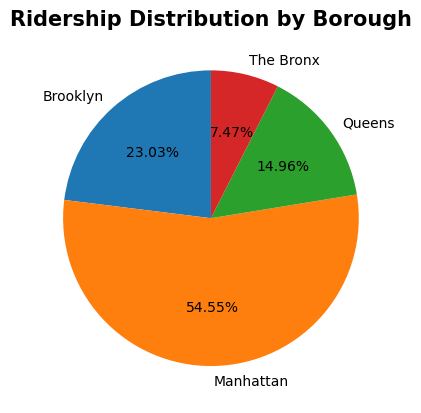

In [22]:
plt.title('Ridership Distribution by Borough', fontsize = 15, weight='bold')
plt.pie(ridership_by_borough.ridership, labels=ridership_by_borough.index, autopct='%1.2f%%', startangle=90);
plt.savefig('/Users/shull/Documents/2023/istdsa/project01/images/ridership_distribution_by_borough.png')

# ------------------------------------------------------------------------------------------

In [23]:
high_ridership = df[df.ridership_level == 'High']
medium_ridership = df[df.ridership_level == 'Medium']
low_ridership = df[df.ridership_level == 'Low']
no_ridership = df[df.ridership_level == 'Never']

# High Ridership

In [24]:
high_ridership = high_ridership.sort_values('ridership', ascending=False)
high_ridership = high_ridership.reset_index(drop=True)
high_ridership

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24845,High,2023-06-13 17:00:00,17,Tuesday,1,13,6
1,05/03/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24559,High,2023-05-03 17:00:00,17,Wednesday,2,3,5
2,06/14/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24390,High,2023-06-14 17:00:00,17,Wednesday,2,14,6
3,06/06/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24336,High,2023-06-06 17:00:00,17,Tuesday,1,6,6
4,05/17/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24107,High,2023-05-17 17:00:00,17,Wednesday,2,17,5
...,...,...,...,...,...,...,...,...,...,...,...
59,01/26/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20170,High,2023-01-26 17:00:00,17,Thursday,3,26,1
60,03/14/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20140,High,2023-03-14 17:00:00,17,Tuesday,1,14,3
61,02/02/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20118,High,2023-02-02 17:00:00,17,Thursday,3,2,2
62,02/09/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,20116,High,2023-02-09 17:00:00,17,Thursday,3,9,2


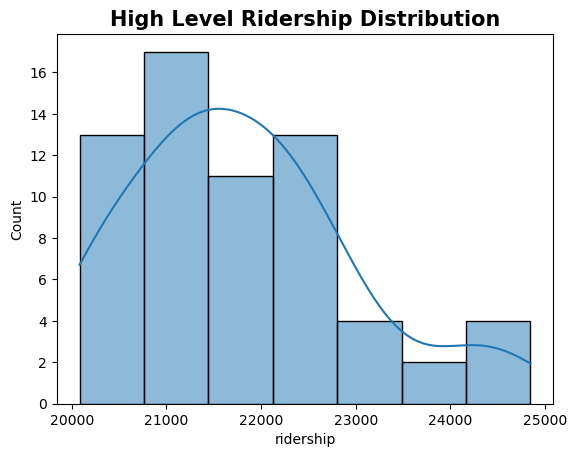

In [25]:
plt.title('High Level Ridership Distribution', fontsize = 15, weight='bold')
sns.histplot(high_ridership.ridership, kde=True, bins=7);

In [26]:
high_ridership.station_complex.unique()

array(['Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)'],
      dtype=object)

## Times Square-42 St

In [27]:
times_sq = df[df.station_complex == 'Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)']
times_sq = times_sq.sort_values(by='ridership', ascending=False)
times_sq = times_sq.reset_index(drop=True)
times_sq

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24845,High,2023-06-13 17:00:00,17,Tuesday,1,13,6
1,05/03/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24559,High,2023-05-03 17:00:00,17,Wednesday,2,3,5
2,06/14/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24390,High,2023-06-14 17:00:00,17,Wednesday,2,14,6
3,06/06/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24336,High,2023-06-06 17:00:00,17,Tuesday,1,6,6
4,05/17/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,24107,High,2023-05-17 17:00:00,17,Wednesday,2,17,5
...,...,...,...,...,...,...,...,...,...,...,...
4074,02/06/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,144,Low,2023-02-06 03:00:00,3,Monday,0,6,2
4075,01/10/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,141,Low,2023-01-10 03:00:00,3,Tuesday,1,10,1
4076,01/03/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,141,Low,2023-01-03 03:00:00,3,Tuesday,1,3,1
4077,01/23/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,134,Low,2023-01-23 03:00:00,3,Monday,0,23,1


In [28]:
times_sq_sorted = times_sq.sort_values(['month', 'day', 'hour'])
times_sq_sorted = times_sq_sorted.reset_index(drop=True)
times_sq_sorted

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,01/01/2023 01:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6609,Medium,2023-01-01 01:00:00,1,Sunday,6,1,1
1,01/01/2023 02:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,3910,Low,2023-01-01 02:00:00,2,Sunday,6,1,1
2,01/01/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,1799,Low,2023-01-01 03:00:00,3,Sunday,6,1,1
3,01/01/2023 04:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,989,Low,2023-01-01 04:00:00,4,Sunday,6,1,1
4,01/01/2023 05:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,564,Low,2023-01-01 05:00:00,5,Sunday,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6202,Medium,2023-06-19 20:00:00,20,Monday,0,19,6
4075,06/19/2023 09:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,5787,Medium,2023-06-19 21:00:00,21,Monday,0,19,6
4076,06/19/2023 10:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6754,Medium,2023-06-19 22:00:00,22,Monday,0,19,6
4077,06/19/2023 11:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,3238,Low,2023-06-19 23:00:00,23,Monday,0,19,6


In [29]:
times_sq_day_of_week = pd.DataFrame(times_sq.groupby('day_of_week')['ridership'].mean().astype(int))
times_sq_day_of_week

,ridership
day_of_week,
0,5627
1,6979
2,7235
3,7016
4,6202
5,4539
6,3673


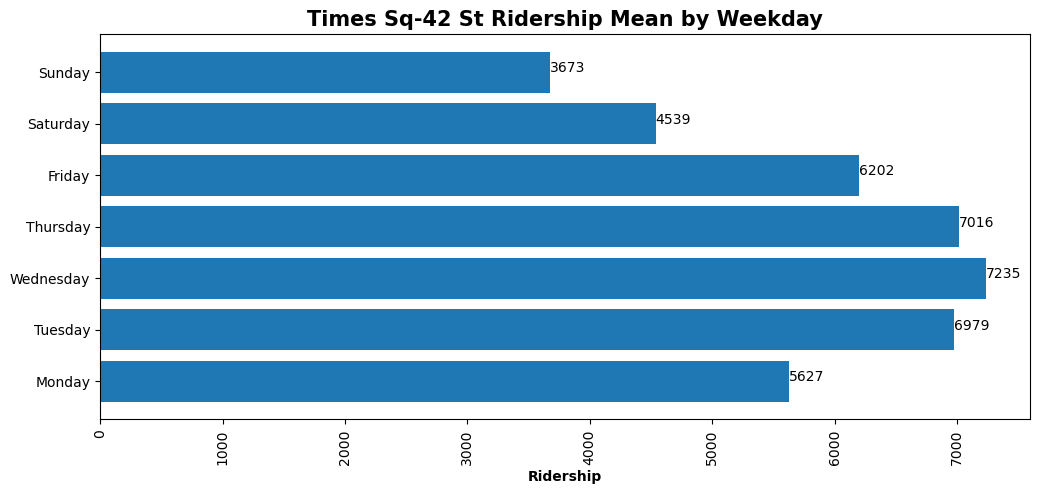

In [30]:
plt.figure(figsize = [12,5])
plt.title('Times Sq-42 St Ridership Mean by Weekday', fontsize = 15, weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, times_sq_day_of_week.ridership)
for index, value in enumerate(times_sq_day_of_week.ridership):
    plt.text(value, index, str(value))
plt.savefig('/Users/shull/Documents/2023/istdsa/project01/images/times_sq_ridership_mean_by_weekday.png')

In [31]:
# Tuesday, Wednesday, Thursday

In [32]:
june_13th_times_sq = times_sq[(times_sq.month == 6) & (times_sq.day == 13)]
june_13th_times_sq = june_13th_times_sq.sort_values('hour')
june_13th_times_sq = june_13th_times_sq.reset_index(drop=True)
june_13th_times_sq

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,1774,Low,2023-06-13 00:00:00,0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,618,Low,2023-06-13 01:00:00,1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,297,Low,2023-06-13 02:00:00,2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,246,Low,2023-06-13 03:00:00,3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,281,Low,2023-06-13 04:00:00,4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,2407,Low,2023-06-13 05:00:00,5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6502,Medium,2023-06-13 06:00:00,6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,9819,Medium,2023-06-13 07:00:00,7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,12837,Medium,2023-06-13 08:00:00,8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,9698,Medium,2023-06-13 09:00:00,9,Tuesday,1,13,6


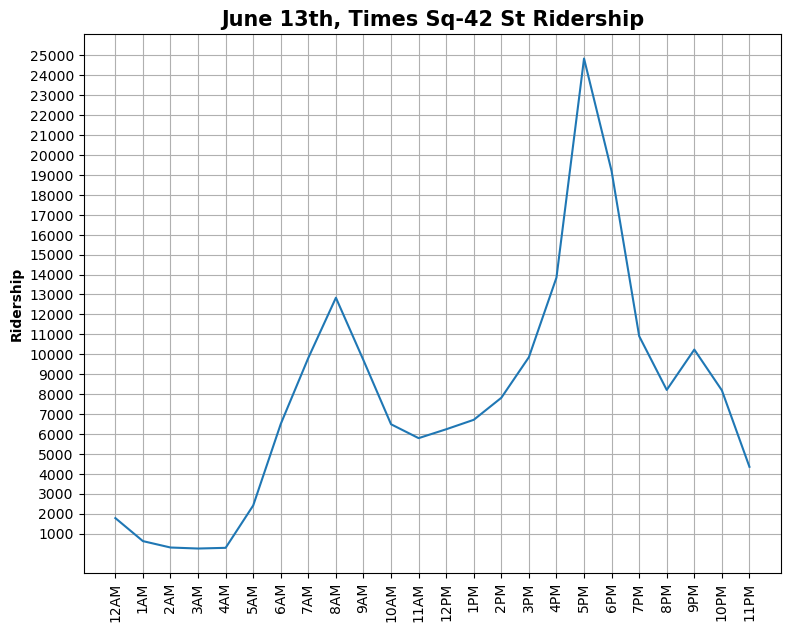

In [33]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_times_sq.ridership)
plt.title('June 13th, Times Sq-42 St Ridership', fontsize = 15, weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 25000,25)
plt.yticks(ticks_y);
plt.savefig('/Users/shull/Documents/2023/istdsa/project01/images/june_13th_times_sq_ridership.png')

In [34]:
june_6th_times_sq = times_sq[(times_sq.month == 6) & (times_sq.day == 6)]
june_6th_times_sq = june_6th_times_sq.sort_values('hour')
june_6th_times_sq = june_6th_times_sq.reset_index(drop=True)
june_6th_times_sq

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/06/2023 12:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,2076,Low,2023-06-06 00:00:00,0,Tuesday,1,6,6
1,06/06/2023 01:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,704,Low,2023-06-06 01:00:00,1,Tuesday,1,6,6
2,06/06/2023 02:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,357,Low,2023-06-06 02:00:00,2,Tuesday,1,6,6
3,06/06/2023 03:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,233,Low,2023-06-06 03:00:00,3,Tuesday,1,6,6
4,06/06/2023 04:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,314,Low,2023-06-06 04:00:00,4,Tuesday,1,6,6
5,06/06/2023 05:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,2395,Low,2023-06-06 05:00:00,5,Tuesday,1,6,6
6,06/06/2023 06:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,6326,Medium,2023-06-06 06:00:00,6,Tuesday,1,6,6
7,06/06/2023 07:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,10089,Medium,2023-06-06 07:00:00,7,Tuesday,1,6,6
8,06/06/2023 08:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,12854,Medium,2023-06-06 08:00:00,8,Tuesday,1,6,6
9,06/06/2023 09:00:00 AM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,10440,Medium,2023-06-06 09:00:00,9,Tuesday,1,6,6


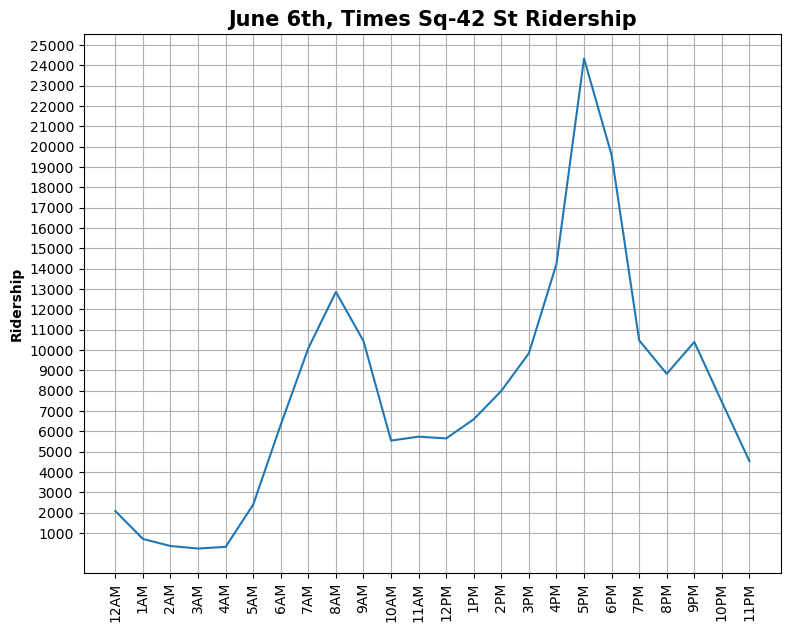

In [35]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_times_sq.ridership)
plt.title('June 6th, Times Sq-42 St Ridership', fontsize = 15, weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 25000,25)
plt.yticks(ticks_y);

In [36]:
# 8AM, 3PM, 4PM, 5PM, 6PM, 7PM

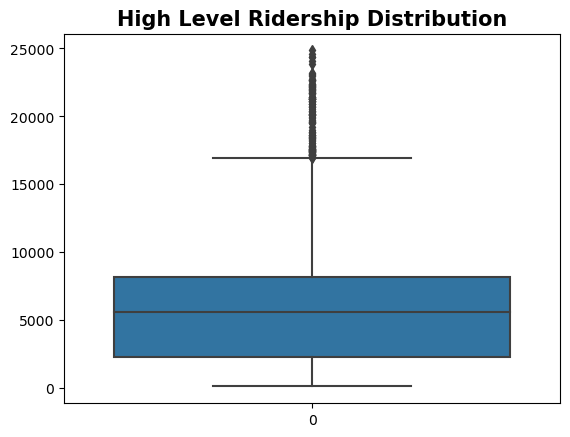

In [37]:
plt.title('High Level Ridership Distribution', fontsize = 15, weight='bold')
sns.boxplot(times_sq.ridership);

# ------------------------------------------------------------------------------------------

# Medium Ridership

In [38]:
medium_ridership = medium_ridership.sort_values('ridership', ascending=False)
medium_ridership = medium_ridership.reset_index(drop=True)
medium_ridership

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/12/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19951,Medium,2023-06-12 17:00:00,17,Monday,0,12,6
1,01/05/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19889,Medium,2023-01-05 17:00:00,17,Thursday,3,5,1
2,03/30/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19727,Medium,2023-03-30 17:00:00,17,Thursday,3,30,3
3,03/23/2023 05:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19623,Medium,2023-03-23 17:00:00,17,Thursday,3,23,3
4,06/06/2023 06:00:00 PM,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",Manhattan,19588,Medium,2023-06-06 18:00:00,18,Tuesday,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...
5916,02/23/2023 05:00:00 PM,"34 St-Penn Station (A,C,E)",Manhattan,5003,Medium,2023-02-23 17:00:00,17,Thursday,3,23,2
5917,04/10/2023 09:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,5002,Medium,2023-04-10 09:00:00,9,Monday,0,10,4
5918,06/14/2023 04:00:00 PM,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,5001,Medium,2023-06-14 16:00:00,16,Wednesday,2,14,6
5919,05/01/2023 07:00:00 AM,"34 St-Penn Station (1,2,3)",Manhattan,5001,Medium,2023-05-01 07:00:00,7,Monday,0,1,5


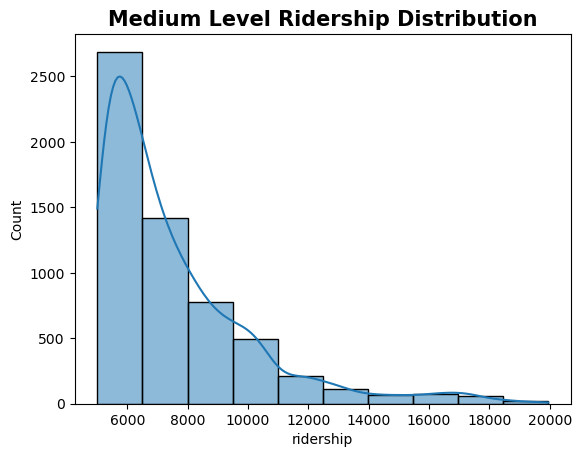

In [39]:
plt.title('Medium Level Ridership Distribution', fontsize = 15, weight='bold')
sns.histplot(medium_ridership.ridership, kde=True, bins=10);

In [40]:
medium_ridership.station_complex.unique()

array(['Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)',
       'Grand Central-42 St (S,4,5,6,7)', 'Fulton St (A,C,J,Z,2,3,4,5)',
       '34 St-Herald Sq (B,D,F,M,N,Q,R,W)',
       '161 St-Yankee Stadium (B,D,4)',
       '47-50 Sts-Rockefeller Center (B,D,F,M)',
       'Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)',
       '14 St-Union Sq (L,N,Q,R,W,4,5,6)', 'Mets-Willets Point (7)',
       '34 St-Penn Station (1,2,3)', '34 St-Penn Station (A,C,E)',
       'Lexington Av-53 St (E,M)/51 St (6)',
       '59 St-Columbus Circle (A,B,C,D,1)',
       'Lexington Av (N,R,W)/59 St (4,5,6)',
       'Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)',
       'Coney Island-Stillwell Av (D,F,N,Q)', 'Flushing-Main St (7)',
       '74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)',
       'Canal St (J,N,Q,R,W,Z,6)', '5 Av-53 St (E,M)'], dtype=object)

## Grand Central-42 St

In [41]:
grand_central = df[df.station_complex == 'Grand Central-42 St (S,4,5,6,7)']
grand_central = grand_central.sort_values(by='ridership', ascending=False)
grand_central = grand_central.reset_index(drop=True)
grand_central

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18873,Medium,2023-06-13 17:00:00,17,Tuesday,1,13,6
1,06/14/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18363,Medium,2023-06-14 17:00:00,17,Wednesday,2,14,6
2,06/06/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18152,Medium,2023-06-06 17:00:00,17,Tuesday,1,6,6
3,02/14/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17830,Medium,2023-02-14 17:00:00,17,Tuesday,1,14,2
4,05/23/2023 05:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17769,Medium,2023-05-23 17:00:00,17,Tuesday,1,23,5
...,...,...,...,...,...,...,...,...,...,...,...
4074,01/09/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,18,Low,2023-01-09 03:00:00,3,Monday,0,9,1
4075,02/06/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17,Low,2023-02-06 03:00:00,3,Monday,0,6,2
4076,01/30/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,17,Low,2023-01-30 03:00:00,3,Monday,0,30,1
4077,03/27/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,16,Low,2023-03-27 03:00:00,3,Monday,0,27,3


In [42]:
grand_central_sorted = grand_central.sort_values(['month', 'day', 'hour'])
grand_central_sorted = grand_central_sorted.reset_index(drop=True)
grand_central_sorted

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,01/01/2023 01:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,1220,Low,2023-01-01 01:00:00,1,Sunday,6,1,1
1,01/01/2023 02:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,695,Low,2023-01-01 02:00:00,2,Sunday,6,1,1
2,01/01/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,444,Low,2023-01-01 03:00:00,3,Sunday,6,1,1
3,01/01/2023 04:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,164,Low,2023-01-01 04:00:00,4,Sunday,6,1,1
4,01/01/2023 05:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,103,Low,2023-01-01 05:00:00,5,Sunday,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,3196,Low,2023-06-19 20:00:00,20,Monday,0,19,6
4075,06/19/2023 09:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2703,Low,2023-06-19 21:00:00,21,Monday,0,19,6
4076,06/19/2023 10:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2256,Low,2023-06-19 22:00:00,22,Monday,0,19,6
4077,06/19/2023 11:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,1320,Low,2023-06-19 23:00:00,23,Monday,0,19,6


In [43]:
grand_central_day_of_week = pd.DataFrame(grand_central.groupby('day_of_week')['ridership'].mean().astype(int))
grand_central_day_of_week

,ridership
day_of_week,
0,3366
1,4296
2,4402
3,4248
4,3363
5,2015
6,1635


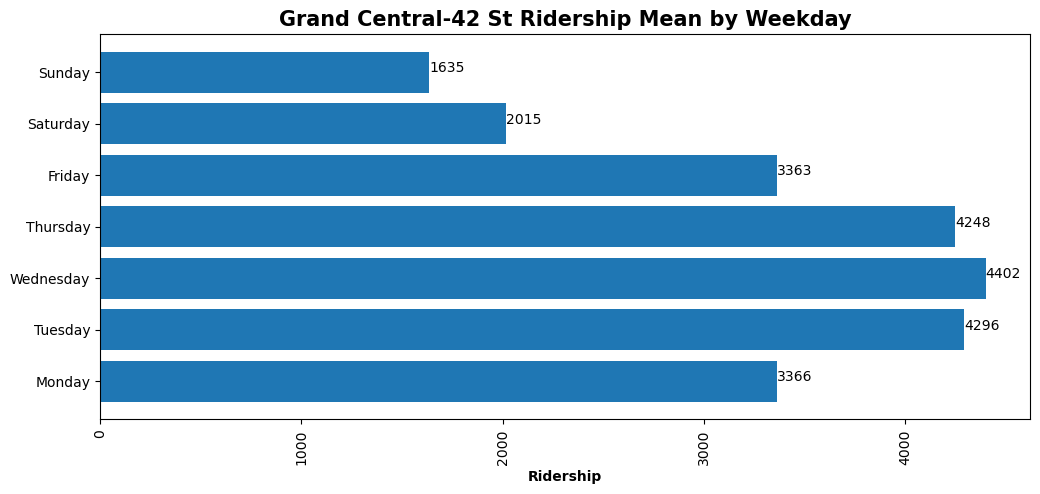

In [44]:
plt.figure(figsize = [12,5])
plt.title('Grand Central-42 St Ridership Mean by Weekday', fontsize = 15, weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, grand_central_day_of_week.ridership)
for index, value in enumerate(grand_central_day_of_week.ridership):
    plt.text(value, index, str(value))

In [45]:
# Tuesday, Wednesday, Thursday

In [46]:
june_13th_grand_central = grand_central[(grand_central.month == 6) & (grand_central.day == 13)]
june_13th_grand_central = june_13th_grand_central.sort_values('hour')
june_13th_grand_central = june_13th_grand_central.reset_index(drop=True)
june_13th_grand_central

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,781,Low,2023-06-13 00:00:00,0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,207,Low,2023-06-13 01:00:00,1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,75,Low,2023-06-13 02:00:00,2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,36,Low,2023-06-13 03:00:00,3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,58,Low,2023-06-13 04:00:00,4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,708,Low,2023-06-13 05:00:00,5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2554,Low,2023-06-13 06:00:00,6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,6961,Medium,2023-06-13 07:00:00,7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,10811,Medium,2023-06-13 08:00:00,8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,6558,Medium,2023-06-13 09:00:00,9,Tuesday,1,13,6


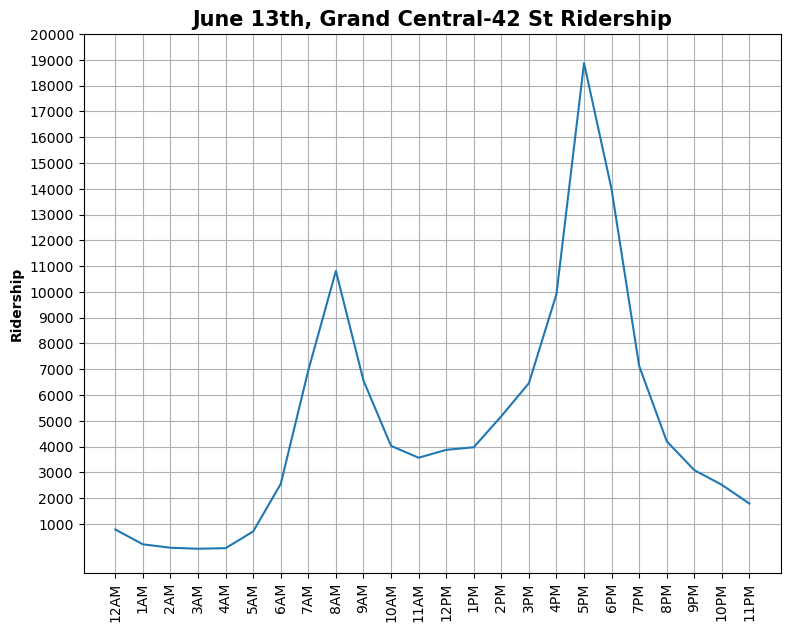

In [47]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_grand_central.ridership)
plt.title('June 13th, Grand Central-42 St Ridership', fontsize = 15, weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 20000,20)
plt.yticks(ticks_y);

In [48]:
june_6th_grand_central = grand_central[(grand_central.month == 6) & (grand_central.day == 6)]
june_6th_grand_central = june_6th_grand_central.sort_values('hour')
june_6th_grand_central = june_6th_grand_central.reset_index(drop=True)
june_6th_grand_central

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/06/2023 12:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,908,Low,2023-06-06 00:00:00,0,Tuesday,1,6,6
1,06/06/2023 01:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,236,Low,2023-06-06 01:00:00,1,Tuesday,1,6,6
2,06/06/2023 02:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,103,Low,2023-06-06 02:00:00,2,Tuesday,1,6,6
3,06/06/2023 03:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,33,Low,2023-06-06 03:00:00,3,Tuesday,1,6,6
4,06/06/2023 04:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,64,Low,2023-06-06 04:00:00,4,Tuesday,1,6,6
5,06/06/2023 05:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,674,Low,2023-06-06 05:00:00,5,Tuesday,1,6,6
6,06/06/2023 06:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,2546,Low,2023-06-06 06:00:00,6,Tuesday,1,6,6
7,06/06/2023 07:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,6814,Medium,2023-06-06 07:00:00,7,Tuesday,1,6,6
8,06/06/2023 08:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,10747,Medium,2023-06-06 08:00:00,8,Tuesday,1,6,6
9,06/06/2023 09:00:00 AM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,7589,Medium,2023-06-06 09:00:00,9,Tuesday,1,6,6


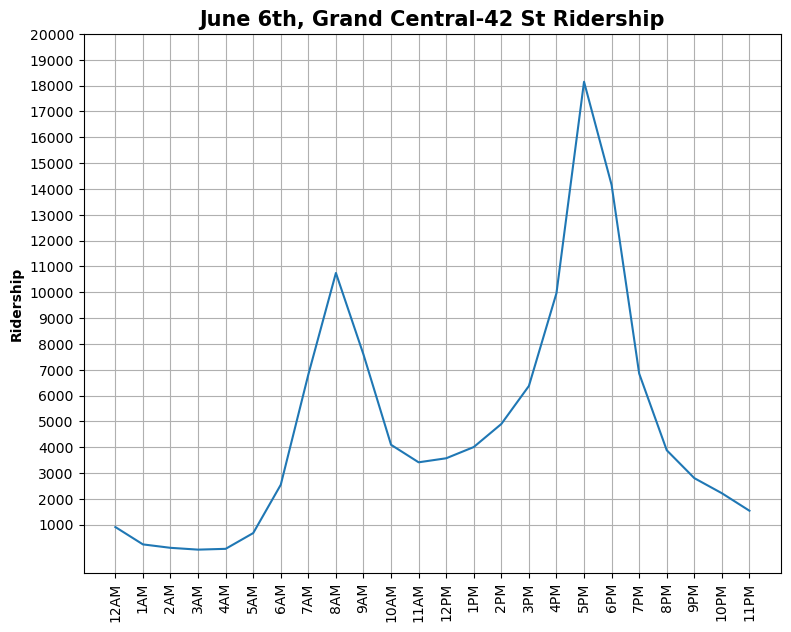

In [49]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_grand_central.ridership)
plt.title('June 6th, Grand Central-42 St Ridership', fontsize = 15, weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 20000,20)
plt.yticks(ticks_y);

In [50]:
# 8AM, 3PM, 4PM, 5PM, 6PM, 7PM

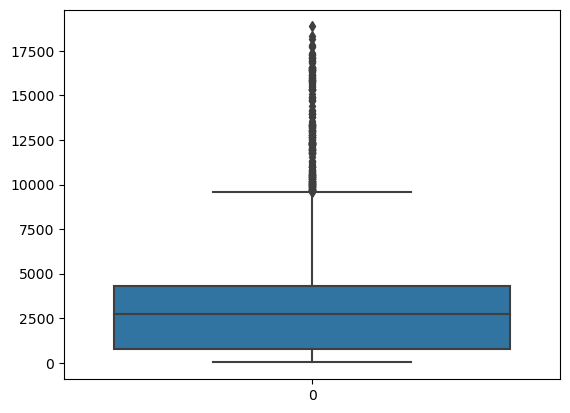

In [51]:
sns.boxplot(data=grand_central.ridership);

## Fulton St

In [52]:
fulton = df[df.station_complex == 'Fulton St (A,C,J,Z,2,3,4,5)']
fulton = fulton.sort_values(by='ridership', ascending=False)
fulton = fulton.reset_index(drop=True)
fulton

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/06/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,12214,Medium,2023-06-06 17:00:00,17,Tuesday,1,6,6
1,06/13/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11893,Medium,2023-06-13 17:00:00,17,Tuesday,1,13,6
2,05/03/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11744,Medium,2023-05-03 17:00:00,17,Wednesday,2,3,5
3,05/16/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11651,Medium,2023-05-16 17:00:00,17,Tuesday,1,16,5
4,05/24/2023 05:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,11628,Medium,2023-05-24 17:00:00,17,Wednesday,2,24,5
...,...,...,...,...,...,...,...,...,...,...,...
4074,03/14/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,2023-03-14 03:00:00,3,Tuesday,1,14,3
4075,01/03/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,2023-01-03 03:00:00,3,Tuesday,1,3,1
4076,02/27/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,18,Low,2023-02-27 03:00:00,3,Monday,0,27,2
4077,01/09/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,14,Low,2023-01-09 03:00:00,3,Monday,0,9,1


In [53]:
fulton_sorted = fulton.sort_values(['month', 'day', 'hour'])
fulton_sorted = fulton_sorted.reset_index(drop=True)
fulton_sorted

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,01/01/2023 01:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,979,Low,2023-01-01 01:00:00,1,Sunday,6,1,1
1,01/01/2023 02:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,575,Low,2023-01-01 02:00:00,2,Sunday,6,1,1
2,01/01/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,240,Low,2023-01-01 03:00:00,3,Sunday,6,1,1
3,01/01/2023 04:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,122,Low,2023-01-01 04:00:00,4,Sunday,6,1,1
4,01/01/2023 05:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,75,Low,2023-01-01 05:00:00,5,Sunday,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1686,Low,2023-06-19 20:00:00,20,Monday,0,19,6
4075,06/19/2023 09:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1350,Low,2023-06-19 21:00:00,21,Monday,0,19,6
4076,06/19/2023 10:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,973,Low,2023-06-19 22:00:00,22,Monday,0,19,6
4077,06/19/2023 11:00:00 PM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,667,Low,2023-06-19 23:00:00,23,Monday,0,19,6


In [54]:
fulton_day_of_week = pd.DataFrame(fulton.groupby('day_of_week')['ridership'].mean().astype(int))
fulton_day_of_week

,ridership
day_of_week,
0,1937
1,2477
2,2542
3,2482
4,2075
5,1262
6,1002


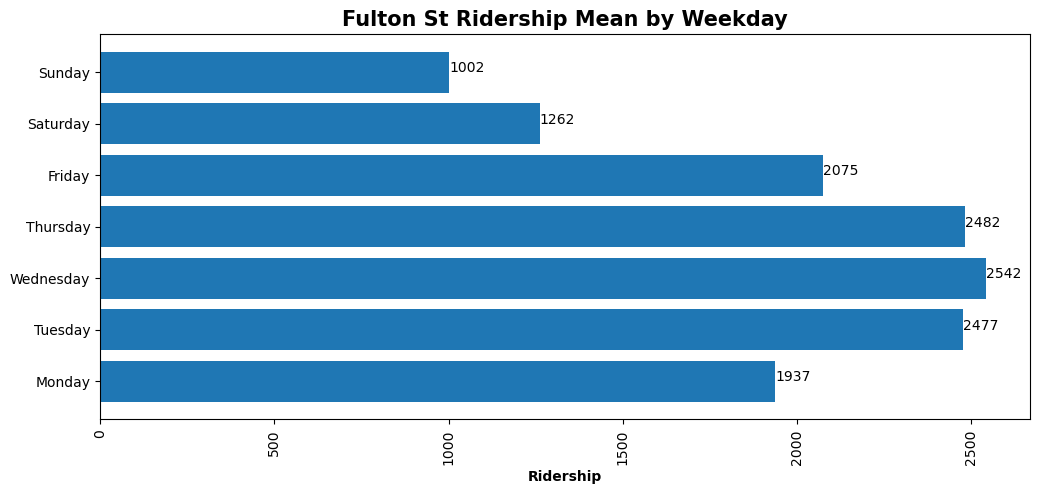

In [55]:
plt.figure(figsize = [12,5])
plt.title('Fulton St Ridership Mean by Weekday', fontsize = 15, weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, fulton_day_of_week.ridership)
for index, value in enumerate(fulton_day_of_week.ridership):
    plt.text(value, index, str(value))

In [56]:
# Tuesday, Wednesday, Thursday

In [57]:
june_6th_fulton = fulton[(fulton.month == 6) & (fulton.day == 6)]
june_6th_fulton = june_6th_fulton.sort_values('hour')
june_6th_fulton = june_6th_fulton.reset_index(drop=True)
june_6th_fulton

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/06/2023 12:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,439,Low,2023-06-06 00:00:00,0,Tuesday,1,6,6
1,06/06/2023 01:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,114,Low,2023-06-06 01:00:00,1,Tuesday,1,6,6
2,06/06/2023 02:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,45,Low,2023-06-06 02:00:00,2,Tuesday,1,6,6
3,06/06/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,44,Low,2023-06-06 03:00:00,3,Tuesday,1,6,6
4,06/06/2023 04:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,42,Low,2023-06-06 04:00:00,4,Tuesday,1,6,6
5,06/06/2023 05:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,359,Low,2023-06-06 05:00:00,5,Tuesday,1,6,6
6,06/06/2023 06:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1220,Low,2023-06-06 06:00:00,6,Tuesday,1,6,6
7,06/06/2023 07:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,2736,Low,2023-06-06 07:00:00,7,Tuesday,1,6,6
8,06/06/2023 08:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,4621,Low,2023-06-06 08:00:00,8,Tuesday,1,6,6
9,06/06/2023 09:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,3107,Low,2023-06-06 09:00:00,9,Tuesday,1,6,6


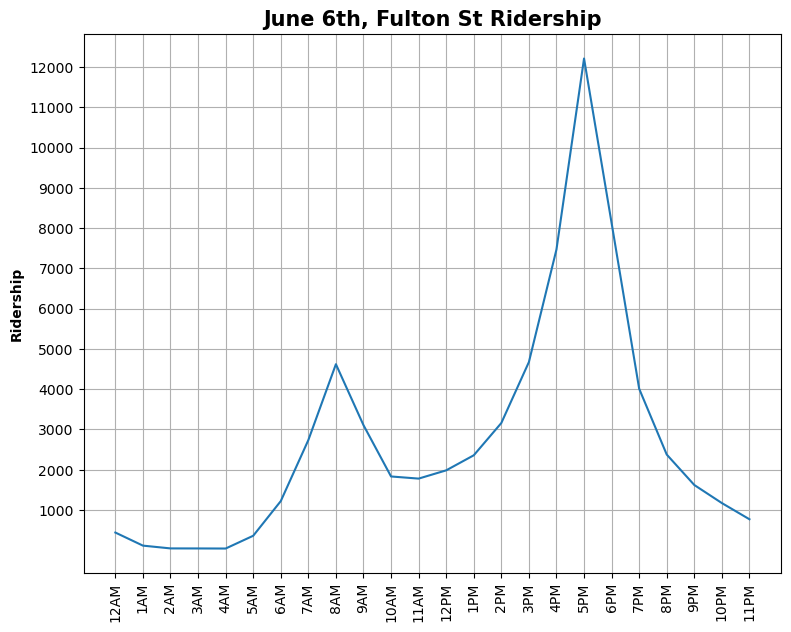

In [58]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_fulton.ridership)
plt.title('June 6th, Fulton St Ridership', fontsize = 15, weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [59]:
june_13th_fulton = fulton[(fulton.month == 6) & (fulton.day == 13)]
june_13th_fulton = june_13th_fulton.sort_values('hour')
june_13th_fulton = june_13th_fulton.reset_index(drop=True)
june_13th_fulton

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,339,Low,2023-06-13 00:00:00,0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,104,Low,2023-06-13 01:00:00,1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,41,Low,2023-06-13 02:00:00,2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,32,Low,2023-06-13 03:00:00,3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,73,Low,2023-06-13 04:00:00,4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,206,Low,2023-06-13 05:00:00,5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,1192,Low,2023-06-13 06:00:00,6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,2686,Low,2023-06-13 07:00:00,7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,4716,Low,2023-06-13 08:00:00,8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,"Fulton St (A,C,J,Z,2,3,4,5)",Manhattan,2984,Low,2023-06-13 09:00:00,9,Tuesday,1,13,6


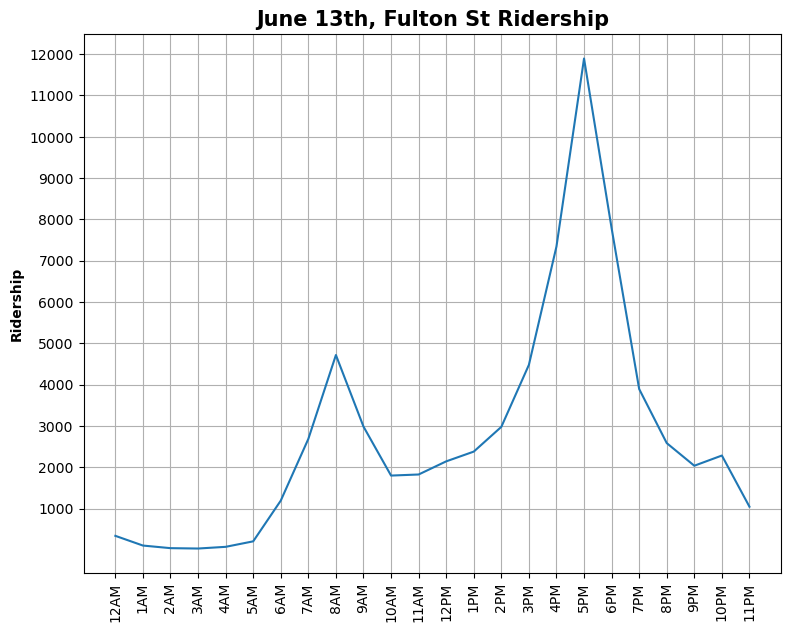

In [60]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_fulton.ridership)
plt.title('June 13th, Fulton St Ridership', fontsize = 15, weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [61]:
# 8AM, 3PM, 4PM, 5PM, 6PM, 7PM

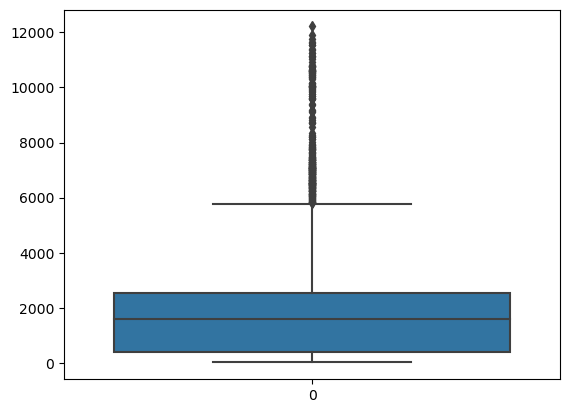

In [62]:
sns.boxplot(data=fulton.ridership);

## Herald Sq 

In [63]:
herald_sq = df[df.station_complex == '34 St-Herald Sq (B,D,F,M,N,Q,R,W)']
herald_sq = herald_sq.sort_values(by='ridership', ascending=False)
herald_sq = herald_sq.reset_index(drop=True)
herald_sq

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/06/2023 05:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11877,Medium,2023-06-06 17:00:00,17,Tuesday,1,6,6
1,05/23/2023 05:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11848,Medium,2023-05-23 17:00:00,17,Tuesday,1,23,5
2,05/03/2023 05:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11684,Medium,2023-05-03 17:00:00,17,Wednesday,2,3,5
3,05/24/2023 05:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11523,Medium,2023-05-24 17:00:00,17,Wednesday,2,24,5
4,06/13/2023 05:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,11484,Medium,2023-06-13 17:00:00,17,Tuesday,1,13,6
...,...,...,...,...,...,...,...,...,...,...,...
4074,04/18/2023 03:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,43,Low,2023-04-18 03:00:00,3,Tuesday,1,18,4
4075,04/10/2023 03:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,39,Low,2023-04-10 03:00:00,3,Monday,0,10,4
4076,02/28/2023 03:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,39,Low,2023-02-28 03:00:00,3,Tuesday,1,28,2
4077,05/30/2023 03:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,38,Low,2023-05-30 03:00:00,3,Tuesday,1,30,5


In [64]:
herald_sq_sorted = herald_sq.sort_values(['month', 'day', 'hour'])
herald_sq_sorted = herald_sq_sorted.reset_index(drop=True)
herald_sq_sorted

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,01/01/2023 01:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,3036,Low,2023-01-01 01:00:00,1,Sunday,6,1,1
1,01/01/2023 02:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1459,Low,2023-01-01 02:00:00,2,Sunday,6,1,1
2,01/01/2023 03:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,780,Low,2023-01-01 03:00:00,3,Sunday,6,1,1
3,01/01/2023 04:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,391,Low,2023-01-01 04:00:00,4,Sunday,6,1,1
4,01/01/2023 05:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,227,Low,2023-01-01 05:00:00,5,Sunday,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,3504,Low,2023-06-19 20:00:00,20,Monday,0,19,6
4075,06/19/2023 09:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,2695,Low,2023-06-19 21:00:00,21,Monday,0,19,6
4076,06/19/2023 10:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1915,Low,2023-06-19 22:00:00,22,Monday,0,19,6
4077,06/19/2023 11:00:00 PM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1063,Low,2023-06-19 23:00:00,23,Monday,0,19,6


In [65]:
herald_sq_day_of_week = pd.DataFrame(herald_sq.groupby('day_of_week')['ridership'].mean().astype(int))
herald_sq_day_of_week

,ridership
day_of_week,
0,2595
1,3072
2,3112
3,3104
4,2849
5,2071
6,1697


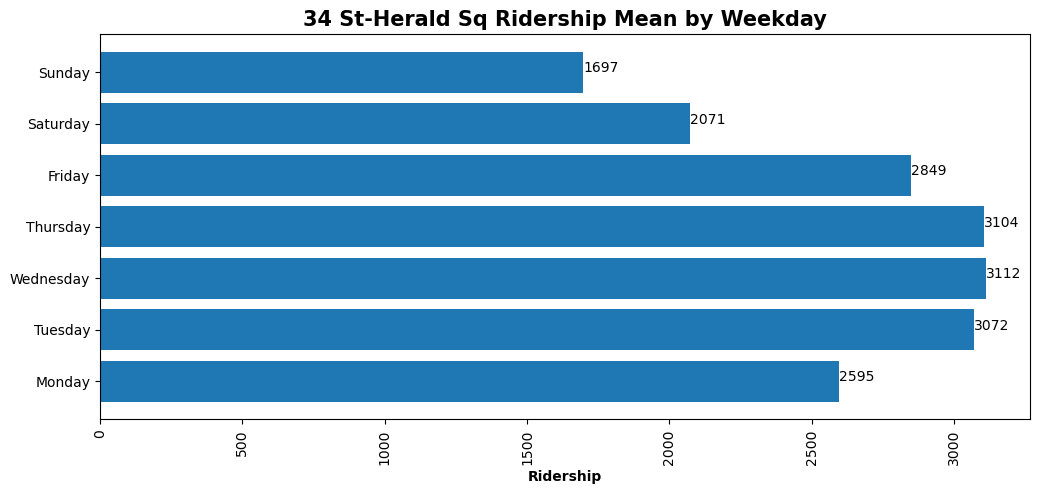

In [66]:
plt.figure(figsize = [12,5])
plt.title('34 St-Herald Sq Ridership Mean by Weekday', fontsize = 15, weight='bold')
plt.xlabel('Ridership', weight='bold')
plt.xticks(rotation=90, ha='center');
plt.barh(weekdays, herald_sq_day_of_week.ridership)
for index, value in enumerate(herald_sq_day_of_week.ridership):
    plt.text(value, index, str(value))

In [67]:
# Tuesday, Wednesday, Thursday

In [68]:
june_6th_herald_sq = herald_sq[(herald_sq.month == 6) & (herald_sq.day == 6)]
june_6th_herald_sq = june_6th_herald_sq.sort_values('hour')
june_6th_herald_sq = june_6th_herald_sq.reset_index(drop=True)
june_6th_herald_sq

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/06/2023 12:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,626,Low,2023-06-06 00:00:00,0,Tuesday,1,6,6
1,06/06/2023 01:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,193,Low,2023-06-06 01:00:00,1,Tuesday,1,6,6
2,06/06/2023 02:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,98,Low,2023-06-06 02:00:00,2,Tuesday,1,6,6
3,06/06/2023 03:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,69,Low,2023-06-06 03:00:00,3,Tuesday,1,6,6
4,06/06/2023 04:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,79,Low,2023-06-06 04:00:00,4,Tuesday,1,6,6
5,06/06/2023 05:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,334,Low,2023-06-06 05:00:00,5,Tuesday,1,6,6
6,06/06/2023 06:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1330,Low,2023-06-06 06:00:00,6,Tuesday,1,6,6
7,06/06/2023 07:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,3022,Low,2023-06-06 07:00:00,7,Tuesday,1,6,6
8,06/06/2023 08:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,4858,Low,2023-06-06 08:00:00,8,Tuesday,1,6,6
9,06/06/2023 09:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,4072,Low,2023-06-06 09:00:00,9,Tuesday,1,6,6


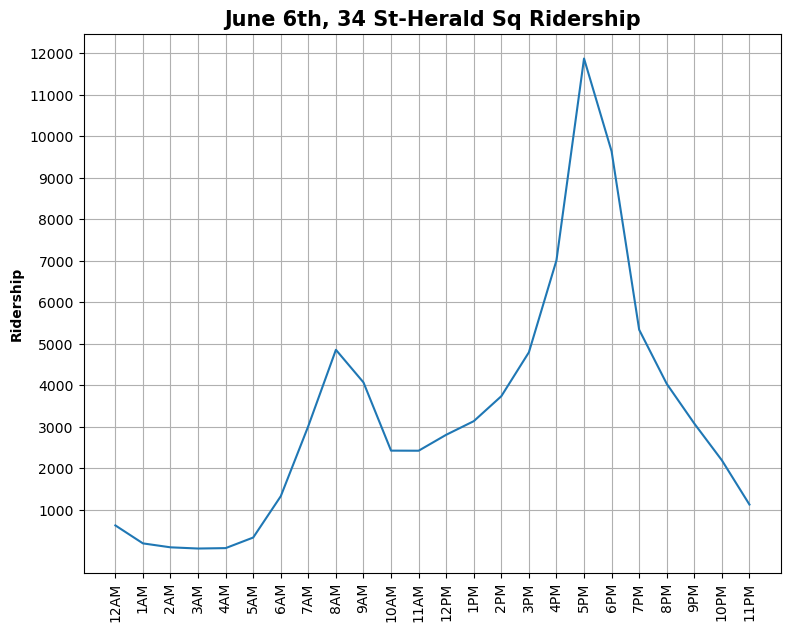

In [69]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_6th_herald_sq.ridership)
plt.title('June 6th, 34 St-Herald Sq Ridership', fontsize = 15, weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [70]:
june_13th_herald_sq = herald_sq[(herald_sq.month == 6) & (herald_sq.day == 13)]
june_13th_herald_sq = june_13th_herald_sq.sort_values('hour')
june_13th_herald_sq = june_13th_herald_sq.reset_index(drop=True)
june_13th_herald_sq

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,06/13/2023 12:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,546,Low,2023-06-13 00:00:00,0,Tuesday,1,13,6
1,06/13/2023 01:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,188,Low,2023-06-13 01:00:00,1,Tuesday,1,13,6
2,06/13/2023 02:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,79,Low,2023-06-13 02:00:00,2,Tuesday,1,13,6
3,06/13/2023 03:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,60,Low,2023-06-13 03:00:00,3,Tuesday,1,13,6
4,06/13/2023 04:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,90,Low,2023-06-13 04:00:00,4,Tuesday,1,13,6
5,06/13/2023 05:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,303,Low,2023-06-13 05:00:00,5,Tuesday,1,13,6
6,06/13/2023 06:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,1355,Low,2023-06-13 06:00:00,6,Tuesday,1,13,6
7,06/13/2023 07:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,2975,Low,2023-06-13 07:00:00,7,Tuesday,1,13,6
8,06/13/2023 08:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,4903,Low,2023-06-13 08:00:00,8,Tuesday,1,13,6
9,06/13/2023 09:00:00 AM,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",Manhattan,3908,Low,2023-06-13 09:00:00,9,Tuesday,1,13,6


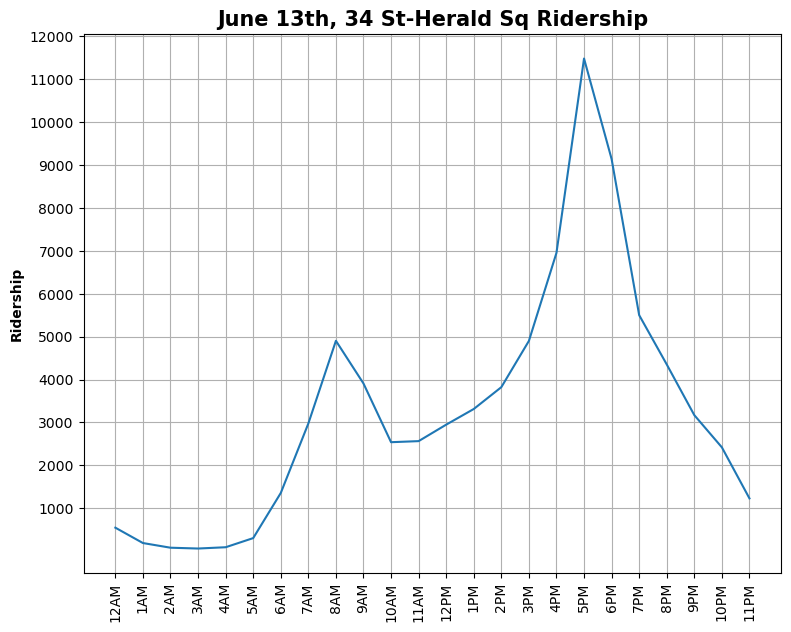

In [71]:
plt.figure(figsize = [9,7])
plt.plot(hours, june_13th_herald_sq.ridership)
plt.title('June 13th, 34 St-Herald Sq Ridership', fontsize = 15, weight='bold');
plt.ylabel('Ridership', weight='bold')
plt.grid()
plt.xticks(rotation=90, ha='center')
ticks_y = np.linspace(1000, 12000,12)
plt.yticks(ticks_y);

In [72]:
# 8AM, 3PM, 4PM, 5PM, 6PM, 7PM

# ------------------------------------------------------------------------------------------

# Low Ridership

In [73]:
low_ridership = low_ridership.sort_values('ridership', ascending=False)
low_ridership = low_ridership.reset_index(drop=True)
low_ridership

,transit_timestamp,station_complex,borough,ridership,ridership_level,timestamp,hour,day_name,day_of_week,day,month
0,05/22/2023 04:00:00 PM,"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortla...",Manhattan,5000,Low,2023-05-22 16:00:00,16,Monday,0,22,5
1,02/27/2023 07:00:00 PM,"Grand Central-42 St (S,4,5,6,7)",Manhattan,5000,Low,2023-02-27 19:00:00,19,Monday,0,27,2
2,03/22/2023 06:00:00 PM,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,5000,Low,2023-03-22 18:00:00,18,Wednesday,2,22,3
3,05/06/2023 04:00:00 PM,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",Manhattan,4999,Low,2023-05-06 16:00:00,16,Saturday,5,6,5
4,03/01/2023 06:00:00 PM,"59 St-Columbus Circle (A,B,C,D,1)",Manhattan,4999,Low,2023-03-01 18:00:00,18,Wednesday,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
1685190,02/06/2023 02:00:00 AM,Avenue P (F),Brooklyn,1,Low,2023-02-06 02:00:00,2,Monday,0,6,2
1685191,05/31/2023 12:00:00 AM,71 St (D),Brooklyn,1,Low,2023-05-31 00:00:00,0,Wednesday,2,31,5
1685192,06/17/2023 08:00:00 AM,Avenue N (F),Brooklyn,1,Low,2023-06-17 08:00:00,8,Saturday,5,17,6
1685193,01/16/2023 01:00:00 AM,Junius St (3),Brooklyn,1,Low,2023-01-16 01:00:00,1,Monday,0,16,1


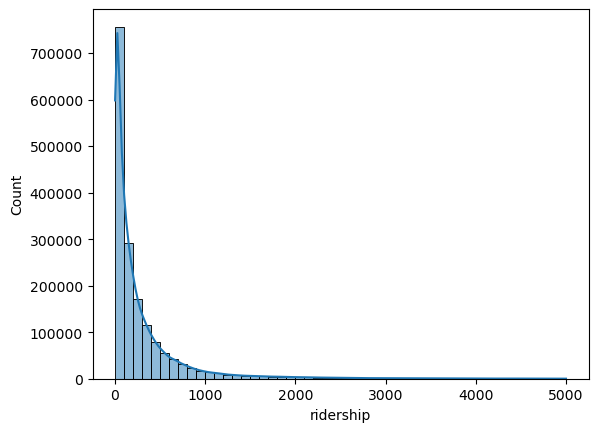

In [74]:
sns.histplot(low_ridership.ridership, kde=True, bins=50);

# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------

# Ridership Counts

## General

In [75]:
riderships = pd.DataFrame(times_sq_sorted.transit_timestamp)
riderships['times_sq'] = pd.DataFrame(times_sq_sorted.ridership)
riderships['grand_central'] = pd.DataFrame(grand_central_sorted.ridership)
riderships['fulton'] = pd.DataFrame(fulton_sorted.ridership)
riderships['herald_sq'] = pd.DataFrame(herald_sq_sorted.ridership)
riderships

,transit_timestamp,times_sq,grand_central,fulton,herald_sq
0,01/01/2023 01:00:00 AM,6609,1220,979,3036
1,01/01/2023 02:00:00 AM,3910,695,575,1459
2,01/01/2023 03:00:00 AM,1799,444,240,780
3,01/01/2023 04:00:00 AM,989,164,122,391
4,01/01/2023 05:00:00 AM,564,103,75,227
...,...,...,...,...,...
4074,06/19/2023 08:00:00 PM,6202,3196,1686,3504
4075,06/19/2023 09:00:00 PM,5787,2703,1350,2695
4076,06/19/2023 10:00:00 PM,6754,2256,973,1915
4077,06/19/2023 11:00:00 PM,3238,1320,667,1063


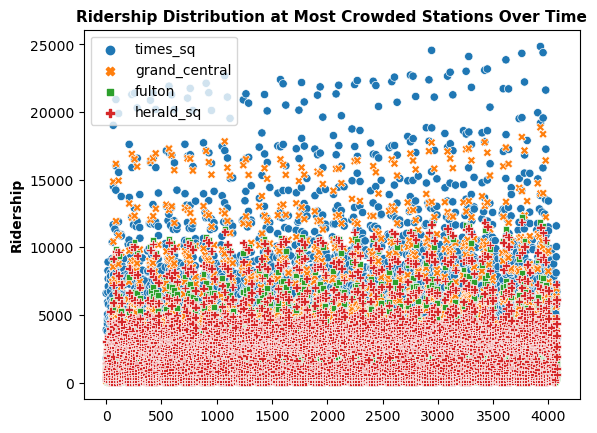

In [76]:
plt.title('Ridership Distribution at Most Crowded Stations Over Time', fontsize = 11, weight='bold')
plt.ylabel('Ridership', weight='bold')
sns.scatterplot(riderships);

## June 13th

In [77]:
june_13th_riderships = pd.DataFrame(june_13th_times_sq.transit_timestamp)
june_13th_riderships['times_sq'] = pd.DataFrame(june_13th_times_sq.ridership)
june_13th_riderships['grand_central'] = pd.DataFrame(june_13th_grand_central.ridership)
june_13th_riderships['fulton'] = pd.DataFrame(june_13th_fulton.ridership)
june_13th_riderships['herald_sq'] = pd.DataFrame(june_13th_herald_sq.ridership)
june_13th_riderships

,transit_timestamp,times_sq,grand_central,fulton,herald_sq
0,06/13/2023 12:00:00 AM,1774,781,339,546
1,06/13/2023 01:00:00 AM,618,207,104,188
2,06/13/2023 02:00:00 AM,297,75,41,79
3,06/13/2023 03:00:00 AM,246,36,32,60
4,06/13/2023 04:00:00 AM,281,58,73,90
5,06/13/2023 05:00:00 AM,2407,708,206,303
6,06/13/2023 06:00:00 AM,6502,2554,1192,1355
7,06/13/2023 07:00:00 AM,9819,6961,2686,2975
8,06/13/2023 08:00:00 AM,12837,10811,4716,4903
9,06/13/2023 09:00:00 AM,9698,6558,2984,3908


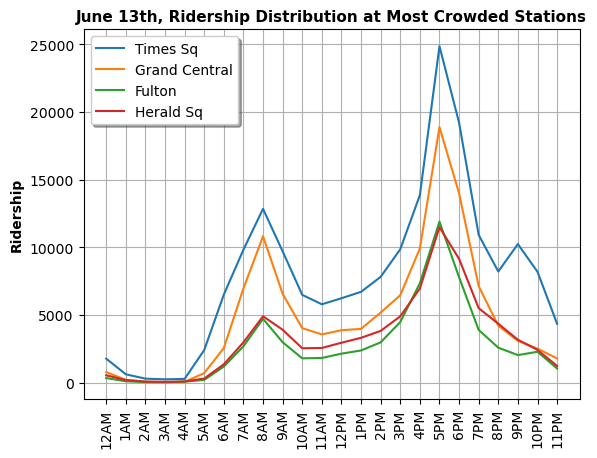

In [78]:
plt.title('June 13th, Ridership Distribution at Most Crowded Stations', fontsize = 11, weight='bold')
plt.ylabel('Ridership', weight='bold')
plt.plot(hours, june_13th_riderships.times_sq)
plt.plot(hours, june_13th_riderships.grand_central)
plt.plot(hours, june_13th_riderships.fulton)
plt.plot(hours, june_13th_riderships.herald_sq)
plt.legend(['Times Sq','Grand Central', 'Fulton', 'Herald Sq'], shadow = True);
plt.grid()
plt.xticks(rotation=90, ha='center');
plt.savefig('/Users/shull/Documents/2023/istdsa/project01/images/june_13th_ridership_distribution_most_crowded_stations.png')

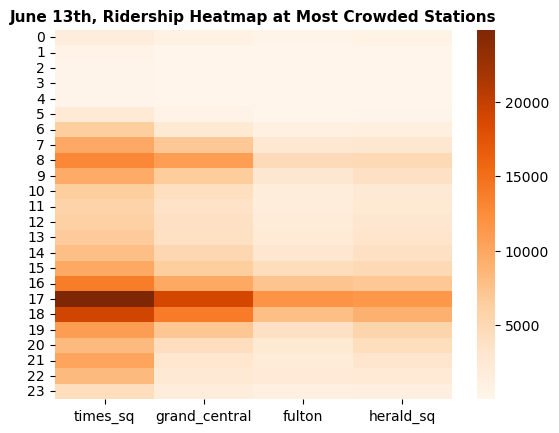

In [79]:
plt.title('June 13th, Ridership Heatmap at Most Crowded Stations', fontsize = 11, weight='bold')
sns.heatmap(june_13th_riderships.drop(columns='transit_timestamp'), cmap='Oranges');
plt.savefig('/Users/shull/Documents/2023/istdsa/project01/images/june_13th_ridership_heatmap_most_crowded_stations.png')

# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------

# Ridership Mean and Max

In [80]:
pd.DataFrame(df.groupby('station_complex').ridership.agg(['count', 'mean', 'max', 'sum']).astype(int)).sort_values('sum', ascending=False).head(10)

,count,mean,max,sum
station_complex,,,,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)",4079,5883,24845,23997128
"Grand Central-42 St (S,4,5,6,7)",4079,3323,18873,13558263
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",4079,2638,11877,10760472
"14 St-Union Sq (L,N,Q,R,W,4,5,6)",4079,2414,8897,9848801
"Fulton St (A,C,J,Z,2,3,4,5)",4079,1963,12214,8008867
"34 St-Penn Station (A,C,E)",4079,1852,8662,7557804
"59 St-Columbus Circle (A,B,C,D,1)",4079,1773,7313,7233125
"34 St-Penn Station (1,2,3)",4079,1712,8679,6984234
"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)",4079,1550,5610,6322752


## 5AM

In [81]:
hour_17 = df[(df.hour == 17)]
hour_17_grouped = hour_17.groupby('station_complex').ridership.agg(['count', 'mean', 'max', 'sum']).astype(int)
hour_17_grouped.sort_values('mean', ascending=False).head(10)

,count,mean,max,sum
station_complex,,,,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)",170,15989,24845,2718161
"Grand Central-42 St (S,4,5,6,7)",170,10990,18873,1868358
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",170,7802,11877,1326415
"Fulton St (A,C,J,Z,2,3,4,5)",170,7081,12214,1203885
"14 St-Union Sq (L,N,Q,R,W,4,5,6)",170,6375,8897,1083799
"47-50 Sts-Rockefeller Center (B,D,F,M)",170,6296,11146,1070455
"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)",170,5314,9364,903414
"59 St-Columbus Circle (A,B,C,D,1)",170,5096,7313,866338
"Lexington Av-53 St (E,M)/51 St (6)",170,4986,8621,847672


In [82]:
hour_17_grouped.sort_values('mean', ascending=False).head(10).index.value_counts()

Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)    1
Grand Central-42 St (S,4,5,6,7)                                                  1
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                                                1
Fulton St (A,C,J,Z,2,3,4,5)                                                      1
14 St-Union Sq (L,N,Q,R,W,4,5,6)                                                 1
47-50 Sts-Rockefeller Center (B,D,F,M)                                           1
Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)                          1
59 St-Columbus Circle (A,B,C,D,1)                                                1
Lexington Av-53 St (E,M)/51 St (6)                                               1
Lexington Av (N,R,W)/59 St (4,5,6)                                               1
Name: station_complex, dtype: int64

In [83]:
stations_mean = np.array(['Times Sq', 'Grand Central', 'Herald Sq', 'Fulton', 'Union Sq', 'Rockefeller Center', 'Chambers/Cortlandt', 'Columbus Circle', 'Lexington Av-53 St', 'Lexington Av'])

In [84]:
hour_17_grouped.sort_values('max', ascending=False).head(10)

,count,mean,max,sum
station_complex,,,,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)",170,15989,24845,2718161
"Grand Central-42 St (S,4,5,6,7)",170,10990,18873,1868358
"Fulton St (A,C,J,Z,2,3,4,5)",170,7081,12214,1203885
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",170,7802,11877,1326415
"47-50 Sts-Rockefeller Center (B,D,F,M)",170,6296,11146,1070455
"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)",170,5314,9364,903414
"14 St-Union Sq (L,N,Q,R,W,4,5,6)",170,6375,8897,1083799
"Lexington Av-53 St (E,M)/51 St (6)",170,4986,8621,847672
"59 St-Columbus Circle (A,B,C,D,1)",170,5096,7313,866338


In [85]:
hour_17_grouped.sort_values('max', ascending=False).head(10).index.value_counts()

Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)    1
Grand Central-42 St (S,4,5,6,7)                                                  1
Fulton St (A,C,J,Z,2,3,4,5)                                                      1
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                                                1
47-50 Sts-Rockefeller Center (B,D,F,M)                                           1
Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortlandt (R,W)                          1
14 St-Union Sq (L,N,Q,R,W,4,5,6)                                                 1
Lexington Av-53 St (E,M)/51 St (6)                                               1
59 St-Columbus Circle (A,B,C,D,1)                                                1
Lexington Av (N,R,W)/59 St (4,5,6)                                               1
Name: station_complex, dtype: int64

In [86]:
stations_max = np.array(['Times Sq', 'Grand Central', 'Fulton', 'Herald Sq', 'Rockefeller Center', 'Chambers/Cortlandt', 'Union Sq', 'Lexington Av-53 St', 'Columbus Circle', 'Lexington Av'])

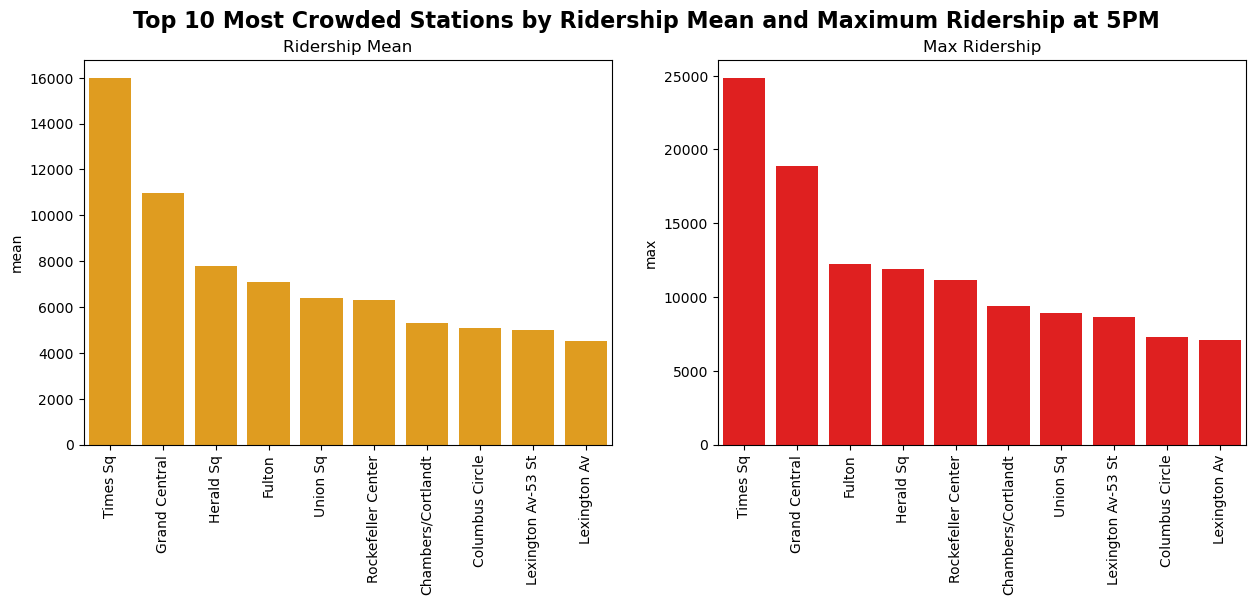

In [87]:
plt.figure(figsize=[15,5])
plt.suptitle('Top 10 Most Crowded Stations by Ridership Mean and Maximum Ridership at 5PM', fontsize = 16, weight='bold')

plt.subplot(1,2,1)
plt.title('Ridership Mean')
plt.xticks(rotation=90, ha='center')
sns.barplot(x=stations_mean, y=hour_17_grouped.sort_values('mean', ascending=False).head(10)['mean'], color='orange');

plt.subplot(1,2,2)
plt.title('Max Ridership')
plt.xticks(rotation=90, ha='center')
sns.barplot(x=stations_max, y=hour_17_grouped.sort_values('max', ascending=False).head(10)['max'], color='red');

## 8AM

In [88]:
hour_8 = df[(df.hour == 8)]
hour_8_grouped = hour_8.groupby('station_complex').ridership.agg(['count', 'mean', 'max', 'sum']).astype(int)
hour_8_grouped.sort_values('mean', ascending=False).head(10)

,count,mean,max,sum
station_complex,,,,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)",170,8276,13441,1407078
"Grand Central-42 St (S,4,5,6,7)",170,5793,10811,984868
"34 St-Penn Station (1,2,3)",170,4427,8679,752610
"34 St-Penn Station (A,C,E)",170,4139,8662,703673
Flushing-Main St (7),168,3852,5663,647150
"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)",170,3600,5610,612026
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",170,3008,5274,511392
"Fulton St (A,C,J,Z,2,3,4,5)",170,2756,4774,468631
"96 St (1,2,3)",170,2199,3768,373856


In [89]:
hour_8_grouped.sort_values('mean', ascending=False).head(10).index.value_counts()

Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)    1
Grand Central-42 St (S,4,5,6,7)                                                  1
34 St-Penn Station (1,2,3)                                                       1
34 St-Penn Station (A,C,E)                                                       1
Flushing-Main St (7)                                                             1
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)                               1
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                                                1
Fulton St (A,C,J,Z,2,3,4,5)                                                      1
96 St (1,2,3)                                                                    1
Junction Blvd (7)                                                                1
Name: station_complex, dtype: int64

In [90]:
stations2_mean = np.array(['Times Sq', 'Grand Central', 'Penn Station (1,2,3)', 'Penn Station (A,C,E)', 'Flushing-Main St', 'Broadway/Jackson Hts-Roosevelt Av', 'Herald Sq', 'Fulton', '96 St', 'Junction Blvd'])

In [91]:
hour_8_grouped.sort_values('max', ascending=False).head(10)

,count,mean,max,sum
station_complex,,,,
"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)",170,8276,13441,1407078
"Grand Central-42 St (S,4,5,6,7)",170,5793,10811,984868
"34 St-Penn Station (1,2,3)",170,4427,8679,752610
"34 St-Penn Station (A,C,E)",170,4139,8662,703673
Flushing-Main St (7),168,3852,5663,647150
"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)",170,3600,5610,612026
"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",170,3008,5274,511392
"Fulton St (A,C,J,Z,2,3,4,5)",170,2756,4774,468631
"14 St-Union Sq (L,N,Q,R,W,4,5,6)",170,2096,3840,356395


In [92]:
hour_8_grouped.sort_values('max', ascending=False).head(10).index.value_counts()

Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)    1
Grand Central-42 St (S,4,5,6,7)                                                  1
34 St-Penn Station (1,2,3)                                                       1
34 St-Penn Station (A,C,E)                                                       1
Flushing-Main St (7)                                                             1
74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R)                               1
34 St-Herald Sq (B,D,F,M,N,Q,R,W)                                                1
Fulton St (A,C,J,Z,2,3,4,5)                                                      1
14 St-Union Sq (L,N,Q,R,W,4,5,6)                                                 1
86 St (4,5,6)                                                                    1
Name: station_complex, dtype: int64

In [93]:
stations2_max = np.array(['Times Sq', 'Grand Central', 'Penn Station (1,2,3)', 'Penn Station (A,C,E)', 'Flushing-Main St', 'Broadway/Jackson Hts-Roosevelt Av', 'Herald Sq', 'Fulton', 'Union Sq', '86 St'])

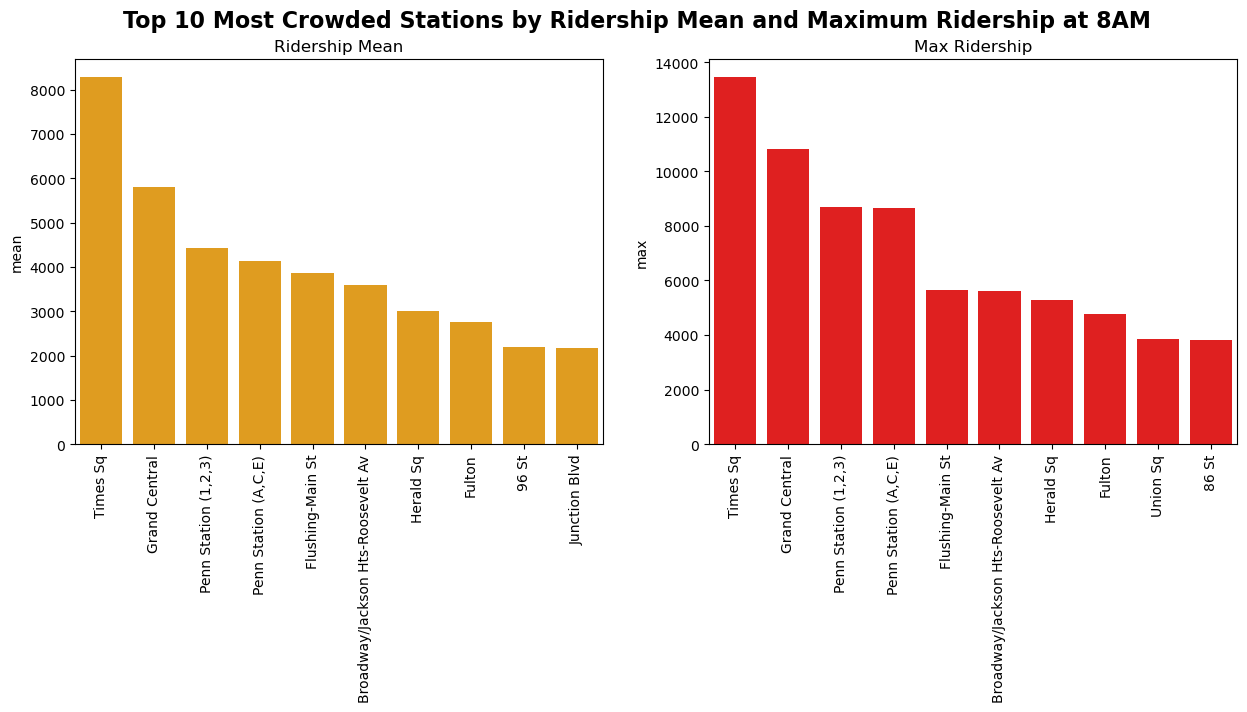

In [94]:
plt.figure(figsize=[15,5])
plt.suptitle('Top 10 Most Crowded Stations by Ridership Mean and Maximum Ridership at 8AM', fontsize = 16, weight='bold')

plt.subplot(1,2,1)
plt.title('Ridership Mean')
plt.xticks(rotation=90, ha='center')
sns.barplot(x=stations2_mean, y=hour_8_grouped.sort_values('mean', ascending=False).head(10)['mean'], color='orange');

plt.subplot(1,2,2)
plt.title('Max Ridership')
plt.xticks(rotation=90, ha='center')
sns.barplot(x=stations2_max, y=hour_8_grouped.sort_values('max', ascending=False).head(10)['max'], color='red');

# ------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------

In [95]:
ridership_mean_by_borough_st_vs_day_of_week = df.pivot_table('ridership', index=['borough', 'station_complex'], columns='day_of_week')
ridership_mean_by_borough_st_vs_day_of_week

day_of_week                                             0           1  \
borough   station_complex                                               
Brooklyn  15 St-Prospect Park (F,G)            160.899329  189.182137   
          18 Av (D)                            170.884550  184.760070   
          18 Av (F)                            110.954128  112.253054   
          18 Av (N)                            148.891667  159.161404   
          20 Av (D)                            140.713087  152.422609   
...                                                   ...         ...   
The Bronx West Farms Sq-East Tremont Av (2,5)  126.645000  137.968804   
          Westchester Sq-East Tremont Av (6)   135.800000  154.505208   
          Whitlock Av (6)                       50.809122   56.117133   
          Woodlawn (4)                         168.010000  186.424610   
          Zerega Av (6)                         66.916084   75.804348   

day_of_week                                             2           3  \
borough   station_complex                                               
Brooklyn  15 St-Prospect Park (F,G)            195.900885  192.617699   
          18 Av (D)                            182.784722  182.383681   
          18 Av (F)                            113.522648  112.540870   
          18 Av (N)                            160.913884  158.671329   
          20 Av (D)                            153.452632  150.061082   
...                                                   ...         ...   
The Bronx West Farms Sq-East Tremont Av (2,5)  145.190972  138.493056   
          Westchester Sq-East Tremont Av (6)   153.305556  152.409722   
          Whitlock Av (6)                       57.873016   56.882042   
          Woodlawn (4)                         189.376736  189.732639   
          Zerega Av (6)                         75.199275   74.172414   

day_of_week                                             4           5  \
borough   station_complex                                               
Brooklyn  15 St-Prospect Park (F,G)            176.968641  121.342657   
          18 Av (D)                            174.998264   99.486911   
          18 Av (F)                            104.197531   39.751979   
          18 Av (N)                            154.677138  105.520979   
          20 Av (D)                            145.548780   87.596859   
...                                                   ...         ...   
The Bronx West Farms Sq-East Tremont Av (2,5)  139.901042   77.255208   
          Westchester Sq-East Tremont Av (6)   140.909722   52.917782   
          Whitlock Av (6)                       54.225131   31.310105   
          Woodlawn (4)                         183.243056  105.309028   
          Zerega Av (6)                         69.787120   28.053608   

day_of_week                                             6  
borough   station_complex                                  
Brooklyn  15 St-Prospect Park (F,G)            102.278992  
          18 Av (D)                             86.689713  
          18 Av (F)                             40.371859  
          18 Av (N)                             93.694915  
          20 Av (D)                             74.838435  
...                                                   ...  
The Bronx West Farms Sq-East Tremont Av (2,5)   60.811037  
          Westchester Sq-East Tremont Av (6)    40.770093  
          Whitlock Av (6)                       23.860972  
          Woodlawn (4)                          80.381271  
          Zerega Av (6)                         21.510721  

[423 rows x 7 columns]

In [96]:
ridership_mean_by_day_of_week = ridership_mean_by_borough_st_vs_day_of_week.mean(axis='index')
ridership_mean_by_day_of_week

day_of_week
0    315.979294
1    369.036584
2    376.330357
3    372.370952
4    344.969107
5    229.179584
6    184.425273
dtype: float64

In [97]:
# Tuesday, Wednesday, Thursday

In [98]:
ridership_mean_by_st = ridership_mean_by_borough_st_vs_day_of_week.mean(axis='columns')
ridership_mean_by_st

borough    station_complex                    
Brooklyn   15 St-Prospect Park (F,G)              162.741477
           18 Av (D)                              154.569702
           18 Av (F)                               90.513153
           18 Av (N)                              140.218759
           20 Av (D)                              129.233355
                                                     ...    
The Bronx  West Farms Sq-East Tremont Av (2,5)    118.037874
           Westchester Sq-East Tremont Av (6)     118.659726
           Whitlock Av (6)                         47.296789
           Woodlawn (4)                           157.496763
           Zerega Av (6)                           58.777653
Length: 423, dtype: float64

In [99]:
ridership_mean_by_st.describe()

count     423.000000
mean      313.184450
std       456.509968
min         7.436725
25%       104.145787
50%       180.989285
75%       347.733733
max      5896.393078
dtype: float64

In [100]:
ridership_mean_by_st[ridership_mean_by_st > 5000]

borough    station_complex                                                              
Manhattan  Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)/Bryant Pk (B,D,F,M)/5 Av (7)    5896.393078
dtype: float64

In [101]:
# Manhattan  Times Sq-42 St

# ------------------------------------------------------------------------------------------

In [102]:
ridership_mean_by_borough_st_vs_hour = df.pivot_table('ridership', index=['borough', 'station_complex'], columns='hour')
ridership_mean_by_borough_st_vs_hour

hour                                                  0          1         2   \
borough   station_complex                                                       
Brooklyn  15 St-Prospect Park (F,G)            22.711765   6.433735  3.759494   
          18 Av (D)                             5.154762   3.784431  2.813333   
          18 Av (F)                             4.407143   3.395683  3.919118   
          18 Av (N)                             4.116564   3.584906  2.923567   
          20 Av (D)                             6.552941   2.718954  3.420382   
...                                                  ...        ...       ...   
The Bronx West Farms Sq-East Tremont Av (2,5)  13.800000  10.841176  7.686391   
          Westchester Sq-East Tremont Av (6)   11.784431   5.807229  7.271084   
          Whitlock Av (6)                       4.479290   2.986111  3.862275   
          Woodlawn (4)                         29.364706  15.947059  7.798817   
          Zerega Av (6)                         2.101695   1.610619  1.794393   

hour                                                  3          4   \
borough   station_complex                                             
Brooklyn  15 St-Prospect Park (F,G)             2.351724   8.035294   
          18 Av (D)                             9.811765  32.105882   
          18 Av (F)                             3.773723  17.570470   
          18 Av (N)                             4.898810  26.035294   
          20 Av (D)                             4.644970  30.829412   
...                                                  ...        ...   
The Bronx West Farms Sq-East Tremont Av (2,5)  14.535294  32.829412   
          Westchester Sq-East Tremont Av (6)    6.514970  38.975610   
          Whitlock Av (6)                       3.466258  11.476471   
          Woodlawn (4)                         15.076471  40.152941   
          Zerega Av (6)                         5.526667  21.207317   

hour                                                   5           6   \
borough   station_complex                                               
Brooklyn  15 St-Prospect Park (F,G)             32.142012  108.770588   
          18 Av (D)                            149.305882  325.605882   
          18 Av (F)                             65.653333  146.993421   
          18 Av (N)                            100.223529  232.635294   
          20 Av (D)                            130.464706  290.000000   
...                                                   ...         ...   
The Bronx West Farms Sq-East Tremont Av (2,5)  107.658824  193.594118   
          Westchester Sq-East Tremont Av (6)    95.884848  188.842424   
          Whitlock Av (6)                       44.135294   97.717647   
          Woodlawn (4)                         215.652941  397.994118   
          Zerega Av (6)                         76.096970  130.672727   

hour                                                   7           8   \
borough   station_complex                                               
Brooklyn  15 St-Prospect Park (F,G)            374.800000  546.994118   
          18 Av (D)                            554.829412  522.888235   
          18 Av (F)                            295.935897  257.687898   
          18 Av (N)                            431.676471  408.170588   
          20 Av (D)                            475.258824  431.658824   
...                                                   ...         ...   
The Bronx West Farms Sq-East Tremont Av (2,5)  275.776471  250.658824   
          Westchester Sq-East Tremont Av (6)   324.509091  232.624242   
          Whitlock Av (6)                      169.158824  140.370588   
          Woodlawn (4)                         521.276471  355.805882   
          Zerega Av (6)                        224.321212  166.707317   

hour                                                   9   ...          14  \
borough   station_complex                   

In [103]:
ridership_mean_by_hour = ridership_mean_by_borough_st_vs_hour.mean(axis='index')
ridership_mean_by_hour

hour
0      62.032120
1      28.035543
2      16.835979
3      15.511471
4      34.983972
5     118.324732
6     268.287457
7     517.217191
8     617.049282
9     419.596848
10    321.033608
11    312.622544
12    339.395010
13    379.304283
14    450.960793
15    547.369400
16    615.581089
17    710.877205
18    557.913398
19    369.795792
20    270.930331
21    219.206951
22    181.751505
23    117.320456
dtype: float64

In [104]:
ridership_mean_by_hour.describe()

count     24.000000
mean     312.164040
std      212.783100
min       15.511471
25%      118.073663
50%      316.828076
75%      467.524892
max      710.877205
dtype: float64

In [105]:
ridership_mean_by_hour[ridership_mean_by_hour > 500]

hour
7     517.217191
8     617.049282
15    547.369400
16    615.581089
17    710.877205
18    557.913398
dtype: float64

In [106]:
# 7-8 AM and 3-4-5-6 PM